## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. 

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

---
Вначале загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set_palette("deep")

Загрузим наши данные и посмотрим на них:

In [2]:
data = pd.read_csv('clients.csv')
data.head().T

,0,1,2,3,4
ID,1030,1029,2002,2031,1049
Building,1,1,2,2,1
Year of sale,2005,2005,2007,2007,2004
Month of sale,11,10,7,12,11
Type of property,Apartment,Apartment,Apartment,Apartment,Apartment
Property number,30,29,2,31,49
Area (ft.),743.09,756.21,587.28,1604.75,1375.45
Price,"$ 246,172.68","$ 246,331.90","$ 209,280.91","$ 452,667.01","$ 467,083.31"
Status,Sold,Sold,Sold,Sold,Sold
Customer ID,C0028,C0027,C0112,C0160,C0014


Определимся с размерностью наших данных:

In [3]:
data.shape

(195, 25)

Посмотрим краткую информацию по столбцам данных:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

Из этой информации мы можем увидеть следующее:
1. Колонка Price имеет тип object, а для нашего анализа она необходима в численном типе.
2. Есть несколько столбцов, в которых часть данных пропущена. Наиболее важными из них являются Age at time of purchase, Age Interval и Gender, т.к. эту информацию о целевом клиенте мы хотим предоставить.

Добавим колонку с ценой в формате float перед последующим анализом данных:

In [5]:
def convert_price_to_float(row):
    return float(row['Price'].replace('$', '').replace(',', '').strip())
    
data['Numeric price'] = data.apply(convert_price_to_float, axis=1)

Теперь рассмотрим строки, в которых одно из полей Age at time of purchase, Age Interval или Gender осталось пустым:   
\*так же переименуем колонку Age Interval, так как оказалось, что в ее названии есть лишний пробел в конце

In [6]:
data.rename(columns={'Age Interval ': 'Age Interval'}, inplace=True)

columns = ['Age at time of purchase', 'Age Interval', 'Gender']
print(data[data[columns].isna().apply(any, axis=1)].shape)
data[data[columns].isna().apply(any, axis=1)].T

(17, 26)


,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194
ID,1005,1009,1009,1011,1007,1008,2038,2001,1013,1014,1019,1020,1022,1028,1034,1037,1042
Building,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1
Year of sale,2004,2004,2004,2005,2005,2005,2006,2004,2005,2005,2005,2005,2005,2005,2005,2005,2005
Month of sale,3,11,11,9,12,12,10,3,7,7,7,7,7,7,7,7,7
Type of property,Office,Office,Office,Office,Apartment,Office,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment
Property number,5,9,10,11,7,8,38,1,13,14,19,20,22,28,34,37,42
Area (ft.),410.71,1200.82,800.96,827.87,775.69,775.69,1604.75,587.28,756.21,743.09,827.87,1160.36,743.09,1160.36,625.8,756.21,625.8
Price,"$ 117,564.07","$ 317,196.40","$ 264,142.16","$ 222,947.21","$ 250,312.53","$ 246,050.40","$ 529,317.28","$ 169,158.29","$ 206,958.71","$ 206,445.42","$ 239,341.58","$ 398,903.42","$ 210,745.17","$ 331,154.88","$ 204,434.68","$ 189,194.31","$ 204,027.09"
Status,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold
Customer ID,C0001,C0012,C0012,C0025,C0029,C0029,C0055,C0121,C0174,C0174,C0174,C0174,C0174,C0174,C0174,C0174,C0174


Исходя из данных по пропускам сделаем вывод, что данные о поле и возрасте клиента остались пустыми неслучайно. Эти сделки осуществлялись не конкретным клиентом, а целой фирмой. Всего таких строк у нас 17. 

Оценим долю сделок фирм среди всего датасета:

In [7]:
print(f'Доля фирм в поле Entity: {data[data['Entity'] == 'Firm'].shape[0] / data.shape[0]:.2%}')

Доля фирм в поле Entity: 8.72%


Дополнительно посмотрим график рапределения сделок по полю Entity в разрезе годов:

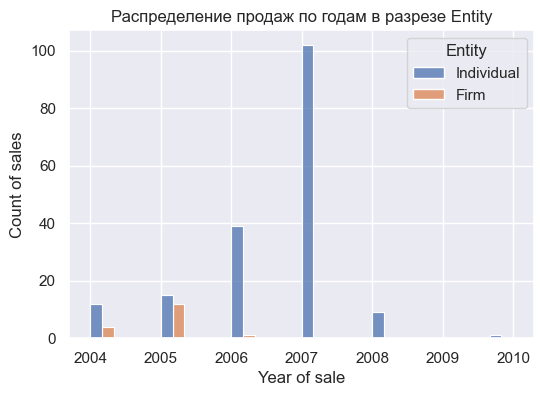

In [8]:
plt.figure(figsize=[6, 4])
plt.title('Распределение продаж по годам в разрезе Entity')
sns.histplot(data=data, x="Year of sale", hue="Entity", multiple="dodge").set(ylabel='Count of sales')
plt.show()

Так как мы видим низкий процент сделок по фирмам, а так же можем отметить, что после 2005 года сделок с фирмами практически не было, мы не будем исследовать эту часть данных для описания целевого клиента. 

Создадим копию нашего датасета, в которой будут данные только по индивидуальным клиентам:

In [9]:
data_ind = data[data['Entity'] != 'Firm'].copy()
data_ind.shape

(178, 26)

В нашем датасете теперь 178 записей. 

Посмотрим подробнее на информацию по нашему датасету:

In [10]:
data_ind.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,178.0,NaN,NaN,NaN,2730.398876,1210.397158,1002.0,2015.25,3006.5,3053.75,5051.0
Building,178.0,NaN,NaN,NaN,2.702247,1.210171,1.0,2.0,3.0,3.0,5.0
Year of sale,178.0,NaN,NaN,NaN,2006.477528,0.998332,2004.0,2006.0,2007.0,2007.0,2010.0
Month of sale,178.0,NaN,NaN,NaN,7.213483,3.439458,1.0,4.0,8.0,10.0,12.0
Type of property,178,2,Apartment,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property number,178.0,NaN,NaN,NaN,28.151685,14.780294,1.0,16.0,28.0,40.0,59.0
Area (ft.),178.0,NaN,NaN,NaN,905.008596,259.384449,579.75,738.245,792.53,1084.23,1942.5
Price,178,177,"$ 460,001.26",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,178,1,Sold,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,178,155,C0079,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы можем увидеть, что в признаке State есть пропущенные значения, но мы не будем с этим ничего делать, так как не используем этот признак для описания целевого клиента. 

Из описания колонок датасета мы уже можем сделать некоторые предположения по целевым клиентам:

1. По полу в нашем датасете большинство составляют клиенты-мужчины (108 из 178).
2. Средний возраст клиентов на момент покупки составляет 46.15 лет, однако по возрастным группам наиболее популярной является группа 36-45 лет (52 из 178). Медианное значение - 45 лет. В принципе медиана и среднее достаточно близки. 
3. В типе покупки превалирует квартира (176 из 178).
4. Средняя площадь купленной квартиры около 905 квадратных футов, при этом медиана составляет 792.53 кватратных футов.   
   Это говорит о том, что у нас есть небольшое количество клиентов, которые покупали квартиры больших (для нашего датасета) площадей, и это внесло некоторое смещение в среднее значение.
6. Средняя цена покупки составляет около 271 тыс., в то время как медиана - около 245 тыс.    
   Вывод из этого такой же, как и в предыдущем пункте, а так же это наталкивает нас на мысль о том, что эти параметры (площадь и цена) могут сильно коррелировать.
7. Цель покупки в основном для проживания (118 из 178).
8. Источником лида в основном является вебсайт (103 из 178).

Посмотрим дополнительно на корреляцию величин в нашем датасете:

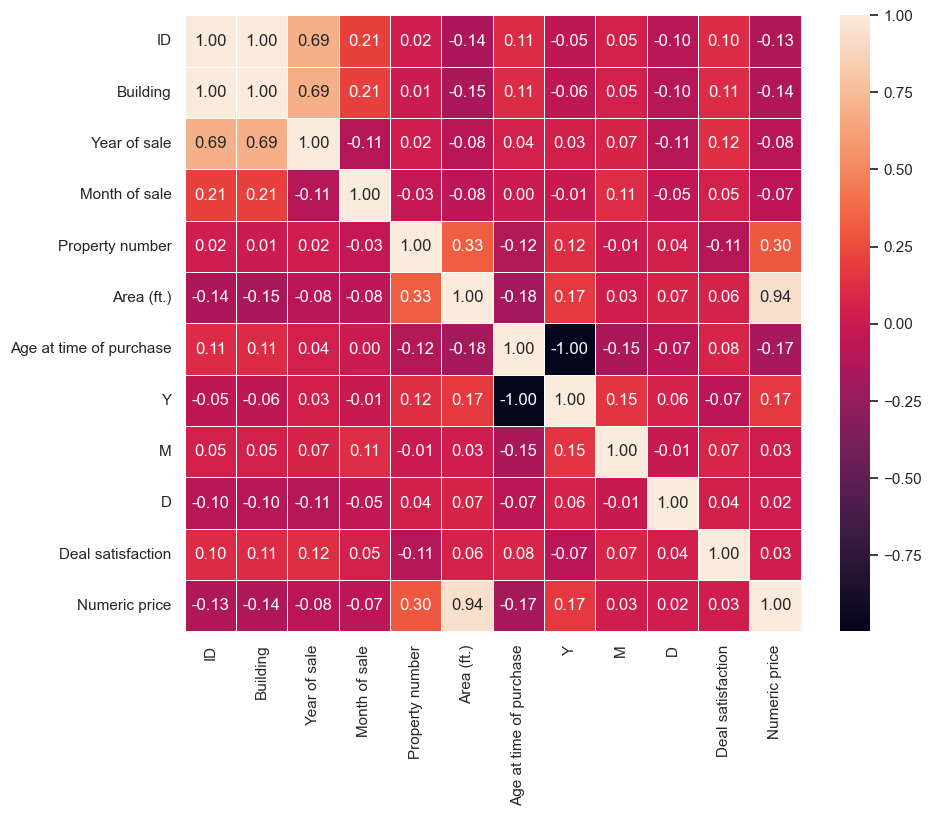

In [11]:
plt.figure(figsize=[10, 8])
sns.heatmap(data_ind.select_dtypes(include='number').corr(), annot=True, square=True, fmt=".2f", linewidths=.5)
plt.show()

Из интересного можно отметить только то, что площадь помещения и цена действительно сильно коррелируют между собой. Коэффициент - 0.94

С общим анализом нашего датасета мы закончили. Теперь можно перейти к формированию портрета нашего целевого клиента.

Для начала посмотрим на графики распределения наших категориальных переменных:

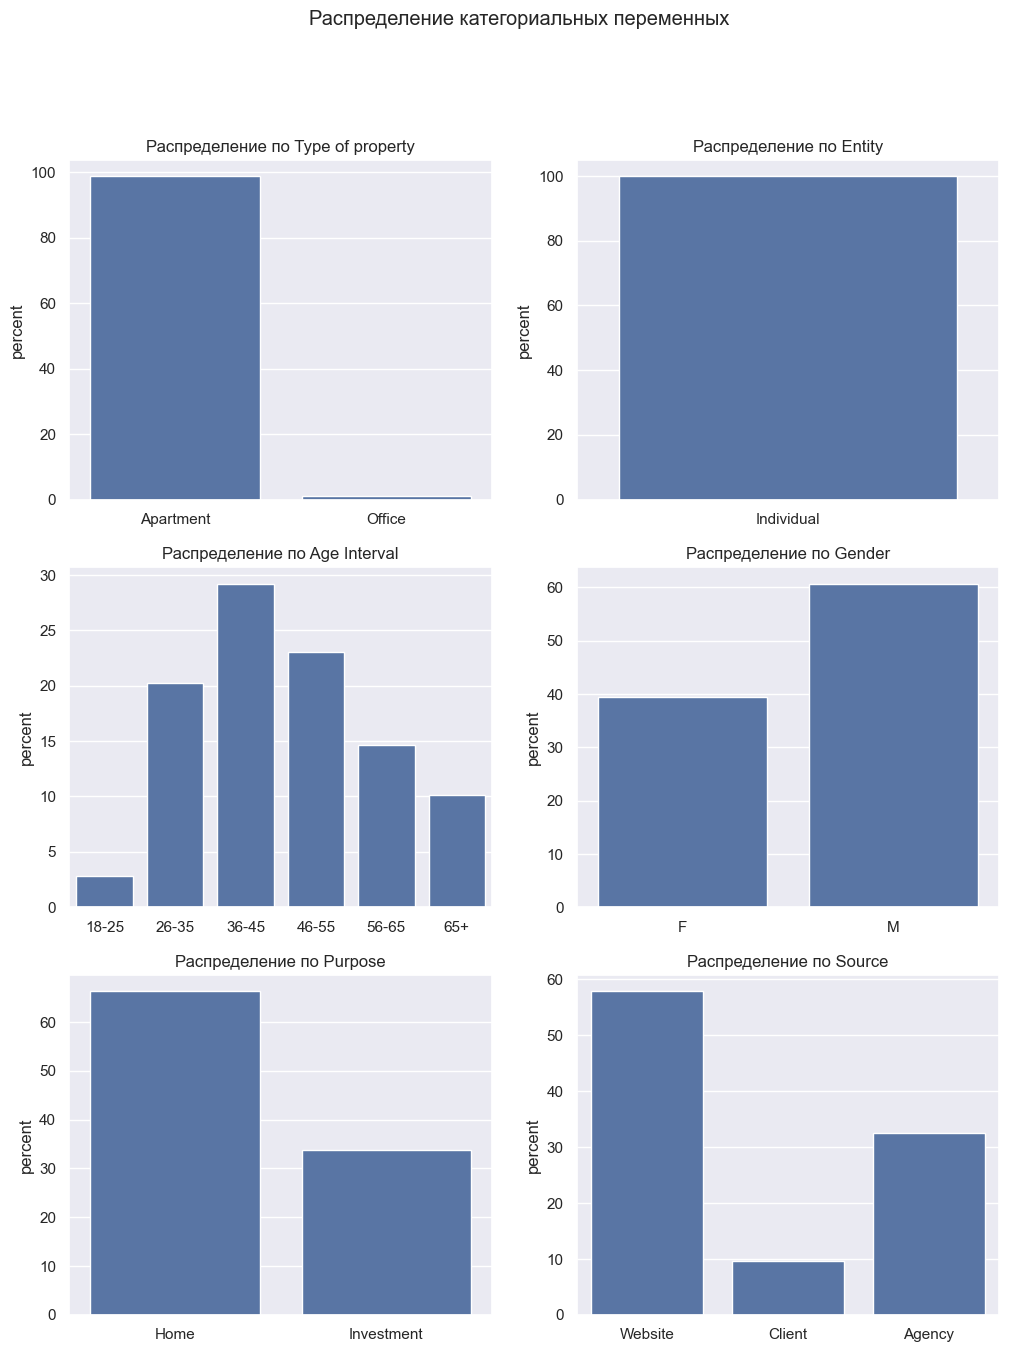

In [12]:
categories = ['Type of property', 'Entity', 'Age Interval', 'Gender', 'Purpose', 'Source']
plt.figure(figsize=[12, 15])
plt.suptitle('Распределение категориальных переменных')
for i, category in enumerate(categories):
    plt.subplot(3, 2, i + 1)
    plt.title('Распределение по ' + category)
    sns.countplot(data=data_ind, x=category, stat='percent').set(xlabel='')
plt.show()

На графиках мы можем увидеть следующее:   
тип приобретаемой площади (Type of property) для нашего целевого клиента однозначно квартира (Apartment),    
по полу мы видим распределение примерно 60/40 для мужчин/женщин,   
по цели приобретения мы видим, что треть клиентов инвестирует в недвижимость, остальные покупают квартиры для проживания,   
по источнику лида у нас превалирует вебсайт, однако около трети пользователей пришли через агенство.

В принципе, для дальнейшего рассмотрения нам категории Type of property и Entity уже не понадобятся

In [13]:
categories.remove('Type of property')
categories.remove('Entity')

Выведем еще точное распределение наших величин:

In [14]:
for col in categories:
    print(data_ind[col].value_counts(normalize=True))

Age Interval
36-45    0.292135
46-55    0.230337
26-35    0.202247
56-65    0.146067
65+      0.101124
18-25    0.028090
Name: proportion, dtype: float64
Gender
M    0.606742
F    0.393258
Name: proportion, dtype: float64
Purpose
Home          0.662921
Investment    0.337079
Name: proportion, dtype: float64
Source
Website    0.578652
Agency     0.325843
Client     0.095506
Name: proportion, dtype: float64


Теперь обратим внимание на наши численные переменные:

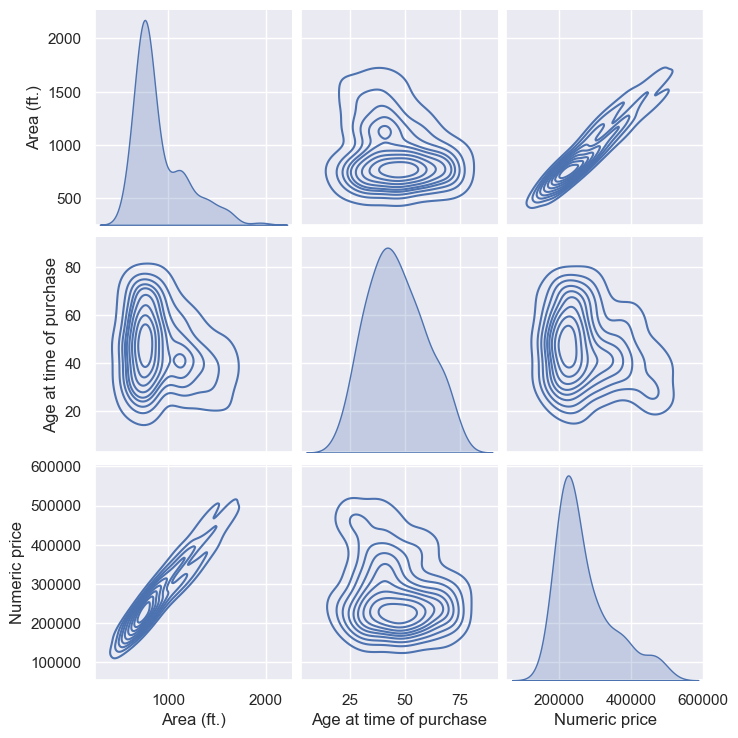

In [15]:
numeric = ['Area (ft.)', 'Age at time of purchase', 'Numeric price']
sns_plot = sns.pairplot(data_ind[numeric], kind='kde')
plt.show()

Тут можно заметить отражение сильной корреляции между ценой и площадью;    
так же можем увидеть, что распределение возраста имеет форму "колокольчика" с одним пиком примерно в середине;    
а вот пики в распределении площади и цены смещены влево, что говорит о том, что полагаться на среднее значение этих величин не стоит;    
так же на графике площади можно заметить еще один небольшой пик.

Посмотрим поближе на распределение численных переменных:

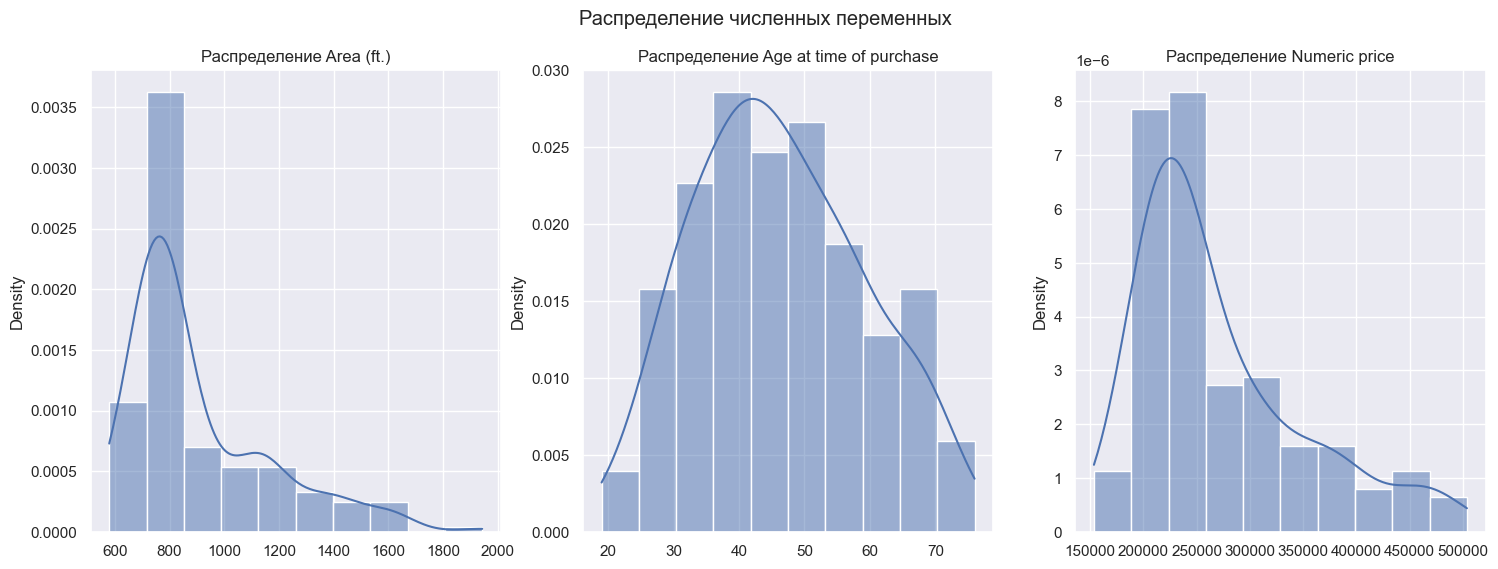

In [16]:
plt.figure(figsize=[18, 6])
plt.suptitle('Распределение численных переменных')
for i, category in enumerate(numeric):
    plt.subplot(1, 3, i + 1)
    plt.title('Распределение ' + category)
    sns.histplot(data=data_ind, x=category, kde=True, element='bars', stat='density', bins=10).set(xlabel='')
plt.show()

Поскольку распределение по возрасту у нас достаточно красивое (плюс/минус симметричное относительно цетра, с одним пиком) мы возьмем этот признак для определения возраста нашей целевой аудитории.

In [17]:
categories.remove('Age Interval')

Теперь можем посмотреть на взаимосвязи численных признаков с категориальными:

In [18]:
print(f'Numeric columns: {numeric}', f'Categories: {categories}', sep='\n')

Numeric columns: ['Area (ft.)', 'Age at time of purchase', 'Numeric price']
Categories: ['Gender', 'Purpose', 'Source']


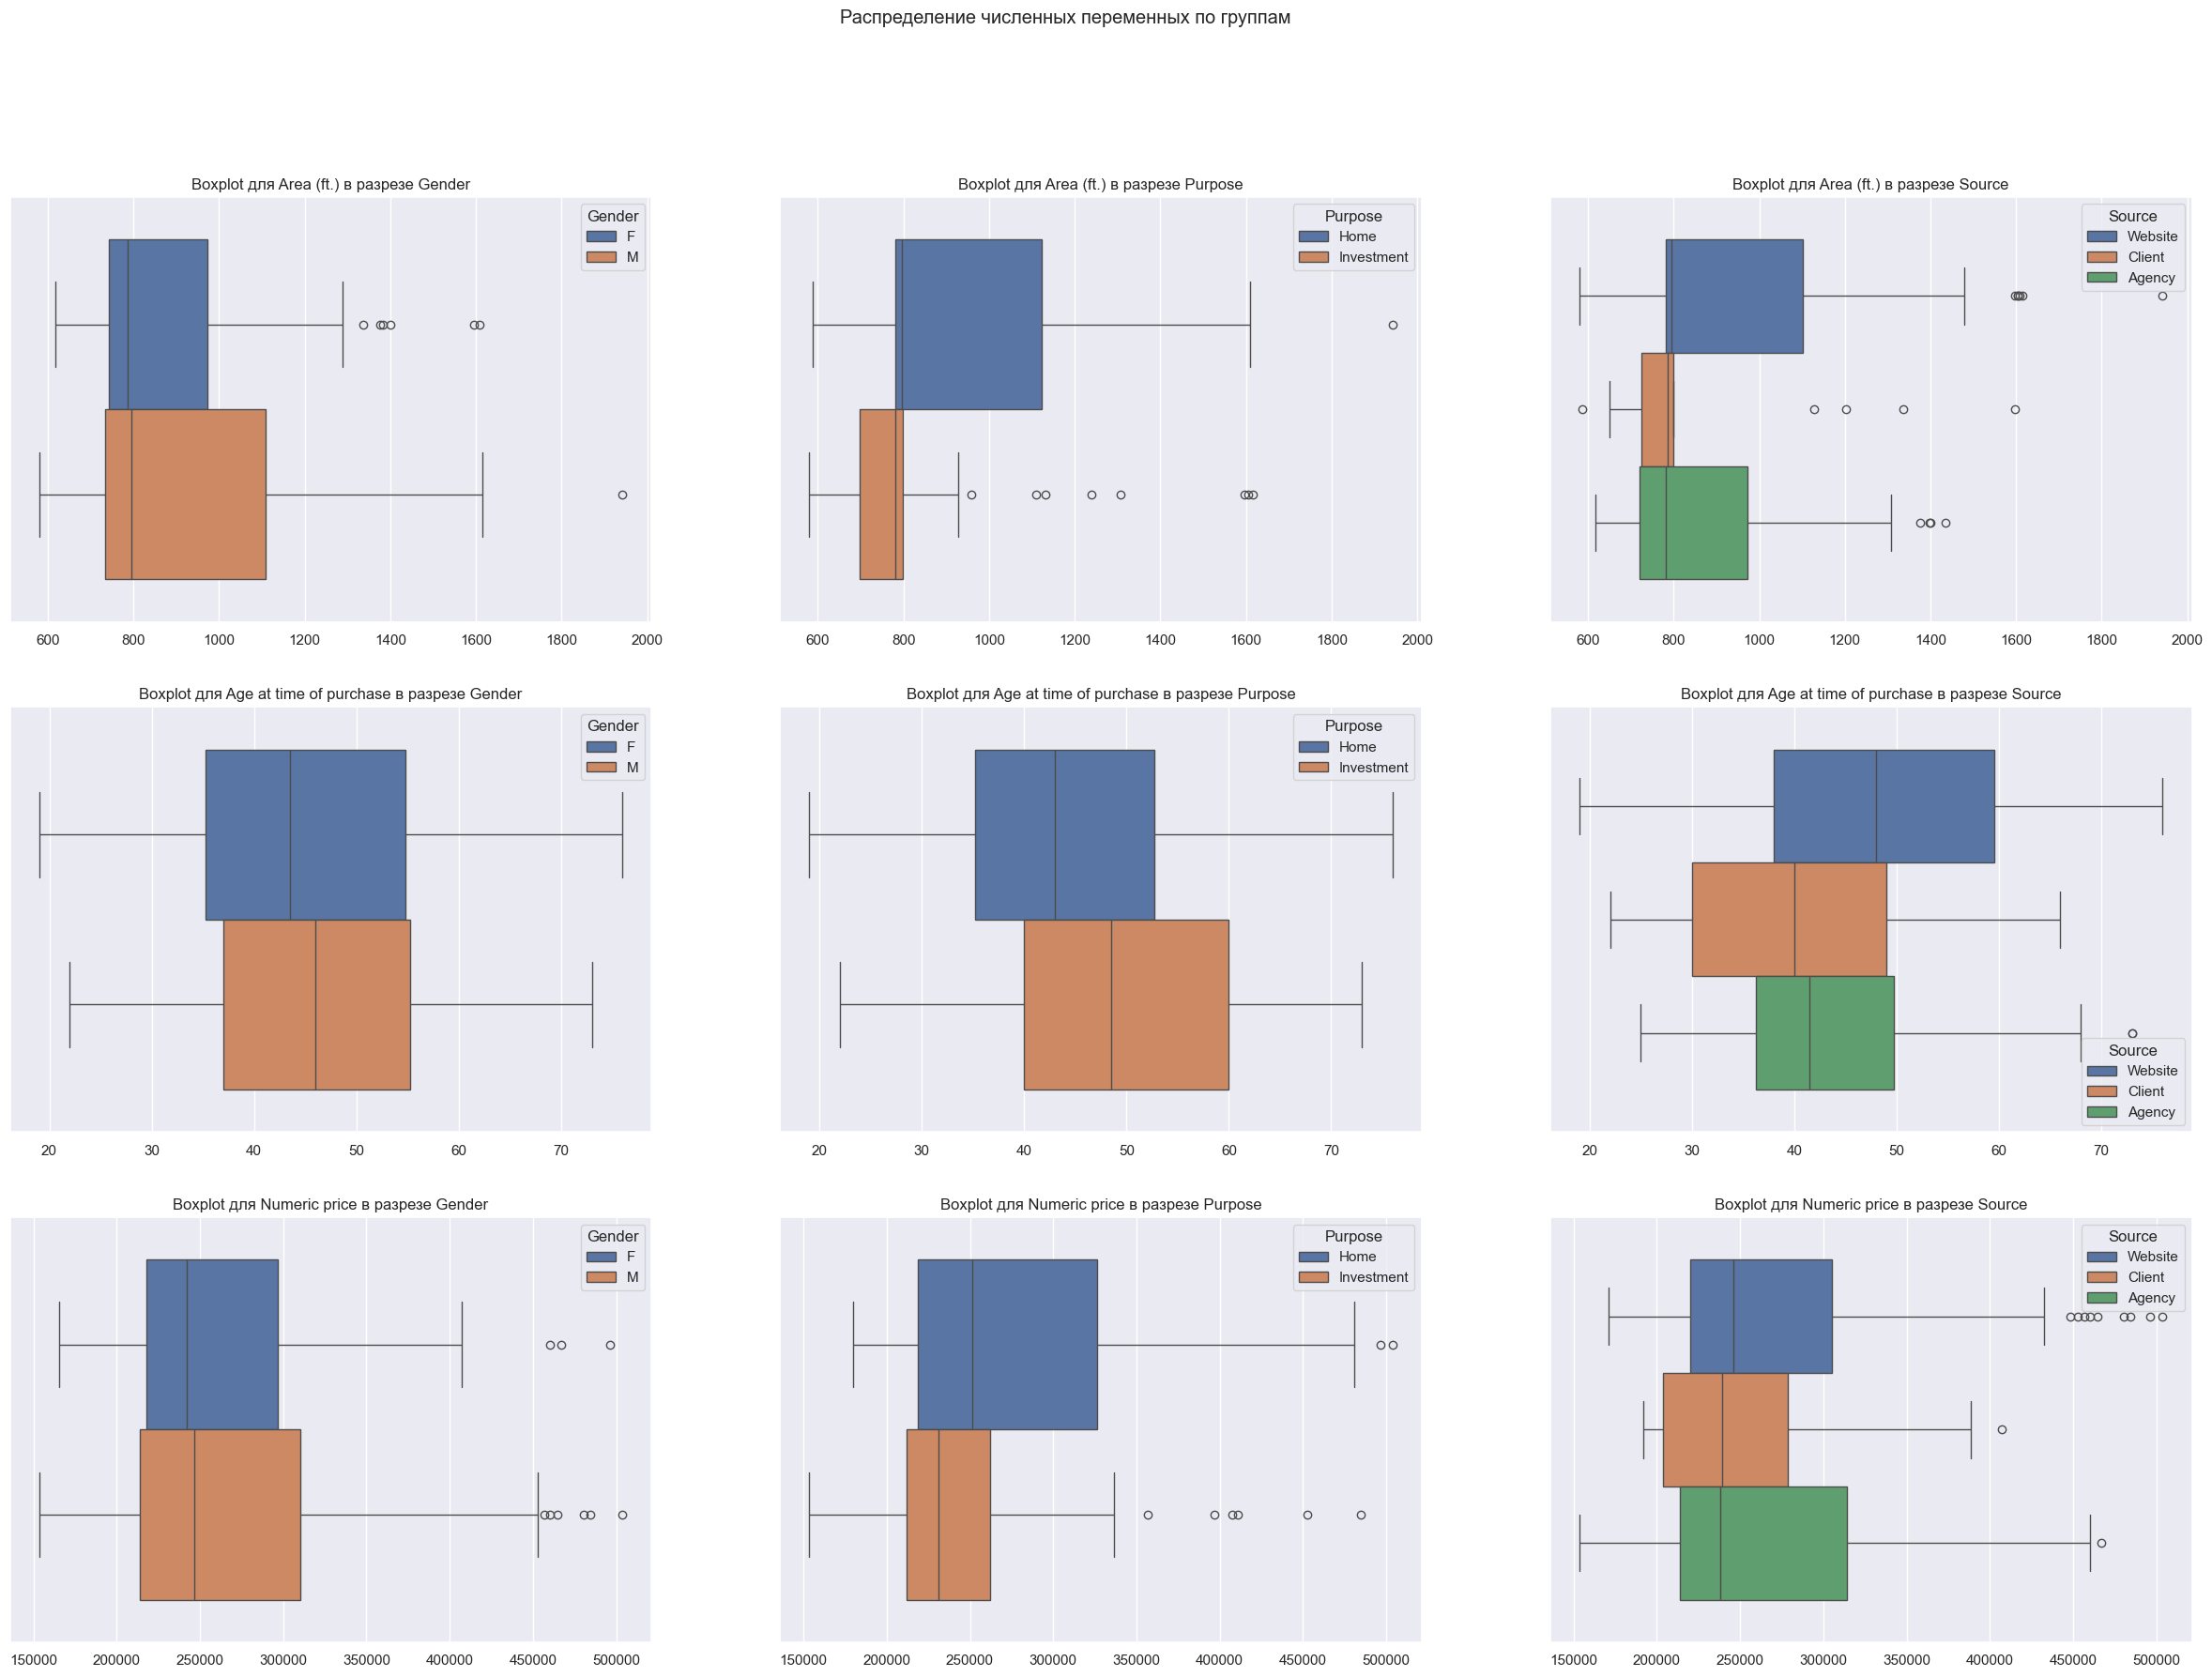

In [19]:
plt.figure(figsize=[30, 20])
plt.suptitle('Распределение численных переменных по группам')
for i, category in enumerate(numeric):
    for j, hue in enumerate(categories):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.title('Boxplot для ' + category + ' в разрезе ' + hue)
        sns.boxplot(data=data_ind, x=category, hue=hue).set(xlabel='')
plt.show()

Из этих графиков так же можем сделать некоторые выводы:
1. Медианное значение площади помещения в разбивке по полу сильно не отличается, однако мужчины все же предпочитают более просторные помещения.
2. Для инвестиций покупают помещения меньшей площади, чем для проживания.
3. Люди, пришедшие к нам с вебсайта, выбирают квартиры попросторнее.  
4. Возраст наших клиентов от гендера особо не зависит
5. Инвестициями в недвижимость занимаются люди, которые усредненно старше тех, кто покупает недвижимость для проживания.
6. Люди, которые пришли к нам с вебсайта усредненно старше других категорий источника лидов (это меня несколько удивило).
7. Медианное значение стоимости недвижимости в разбивке по полу сильно не отличается, однако мужчины все же чаще покупают более дорогие помещения.
8. На приобретение недвижимости в качестве инвестиции тратятся меньшие деньги.

Напоследок рассмотрим взаимные распределения по группам:

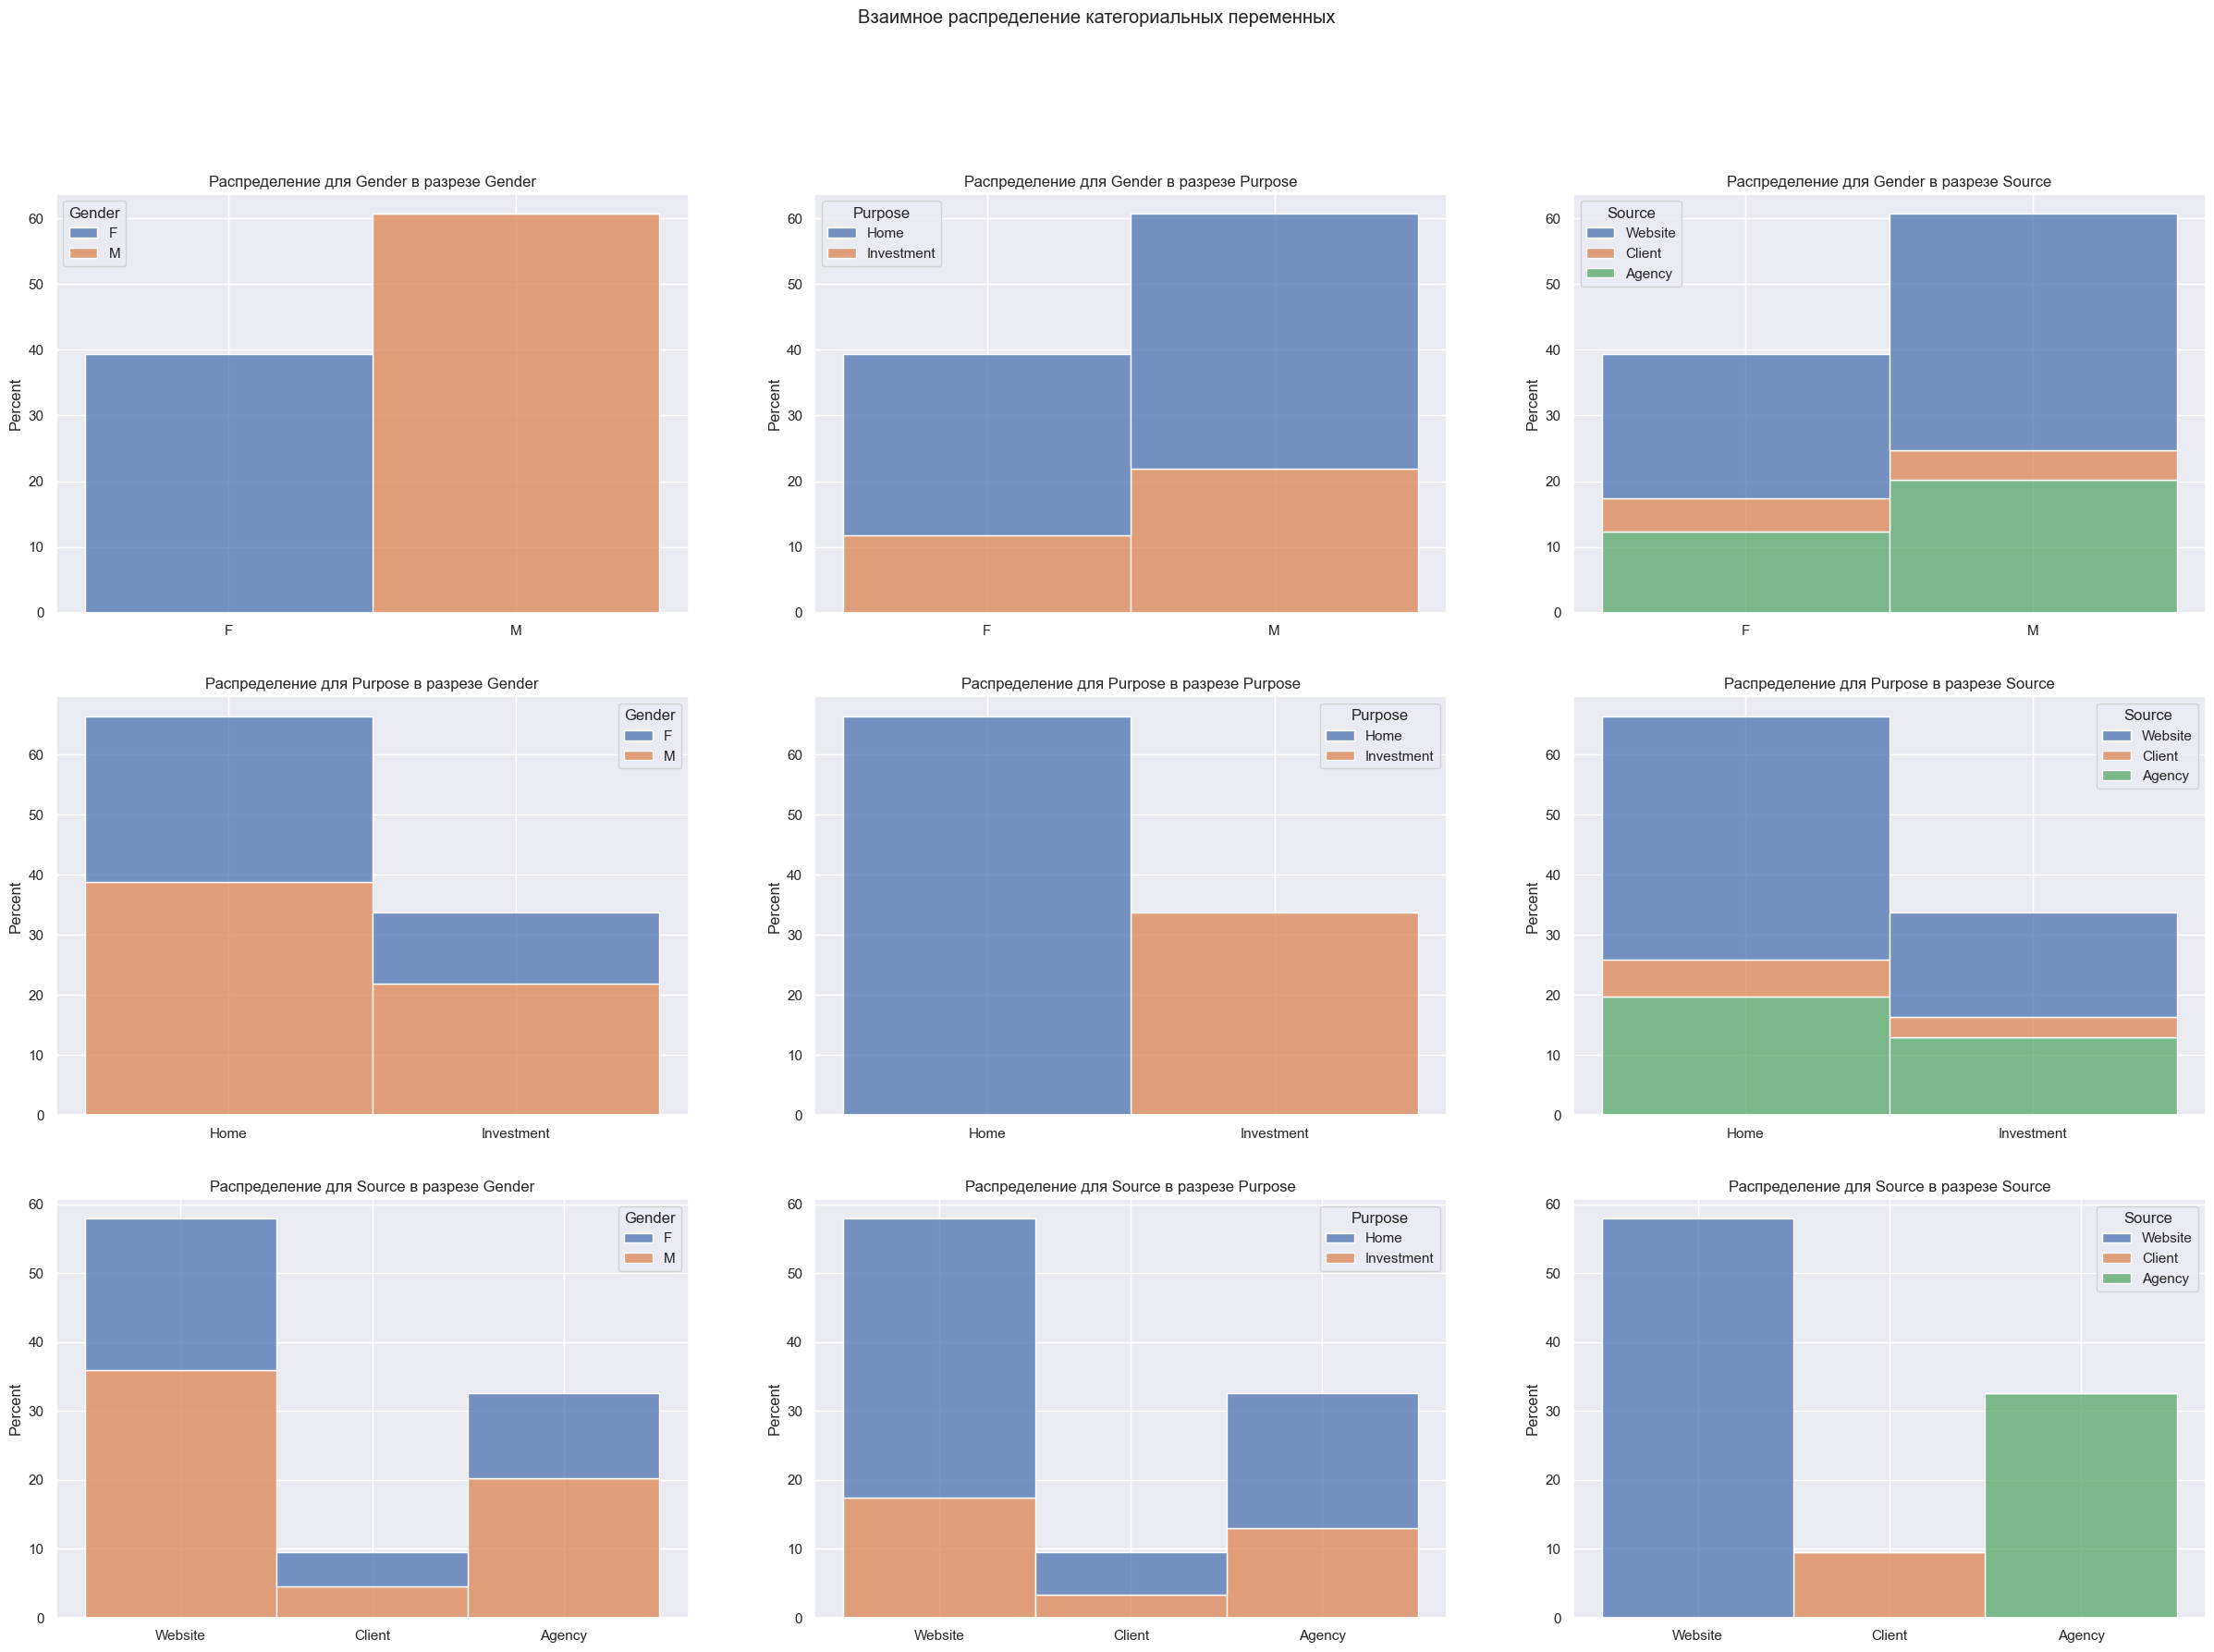

In [20]:
plt.figure(figsize=[30, 20])
plt.suptitle('Взаимное распределение категориальных переменных')
for i, category in enumerate(categories):
    for j, hue in enumerate(categories):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.title('Распределение для ' + category + ' в разрезе ' + hue)
        sns.histplot(data=data_ind, x=category, hue=hue, multiple="stack", stat='percent').set(xlabel='')
plt.show()

Здесь так же можем сделать некоторые выводы о наших клиентах:    
\*В разрезе по полу ничего нового мы не выяснили    
\*Клиенты, приходящие с вебсайта чаще ищут жилье    

Портрет нашего целевого клиента:

Пол мы не определяем, так как соотношение мужчин и женщин - 60 на 40.    
По возрасту я бы обозначила людей среднего возраста и определила промежуток 37 - 55. В этот промежуток поподают 50% наших клиентов (от 25 до 75 персентили).    
Тип недвижимости однозначно квартира.    
Площадь квартиры примерно от 700 до 1100 квадратных футов (от 25 до 75 персентили), хотя стоит отметить, что квартиры площадью 740 - 800 квадратных футов пользуются особой популярностью.    
Средний чек нашего клиента - 271 тыс., однако тут так же стот отметить, что чаще случаются покупки со стоимостью пониже (медиана - 245 тыс.).    
Целью покупки как правило является приобретение жил. площади (66% клиентов).    
Источником лидов в основном является наш вебсайт (58% клиентов), так же важным источником лидов является агенство (33%).    
Стоит отдельно отметить, что клиенты, которые покупают более дорогую недвижимость, реже занимаются инвестициями и по возрасту смещены к более молодым в нашем возрастном промежутке 37 - 55.     